In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Layer, Dense, Flatten, Dropout, Activation

### 이미지 데이터 증폭

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  horizontal_flip= True,
                                   rotation_range=10,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2)

In [5]:
train_generator=train_datagen.flow_from_directory(
    './album/',
    target_size=(48,48),
    batch_size=3,
    class_mode='categorical',
    shuffle=False
)

Found 2996 images belonging to 3 classes.


### 함수

In [14]:
def train_img(rotation, width, height):
    train_datagen = ImageDataGenerator(rescale = 1./255,
                                  horizontal_flip= True,
                                   rotation_range = rotation,
                                  width_shift_range= width,
                                  height_shift_range= height)
    
    train_generator=train_datagen.flow_from_directory(
        './album/',
        target_size=(48,48),
        batch_size=3,
        class_mode='categorical',
        shuffle=False)
    
    all_images = []
    all_labels = []
    
    # 모든 배치를 가져올 때까지 반복합니다.
    for _ in range(len(train_generator)):
        batch_images, batch_labels = next(train_generator)
        all_images.extend(batch_images)
        all_labels.extend(batch_labels)

    all_ = np.stack(all_images)
    all_labels_ = np.vstack(all_labels)
    
    return all_, all_labels_

In [15]:
img, label = train_img(10,0.1,0.1)

Found 2996 images belonging to 3 classes.


In [16]:
img.shape

(2996, 48, 48, 3)

In [18]:
label.shape

(2996, 3)

In [24]:
np.vstack((img,img)).shape

(5992, 48, 48, 3)

In [28]:
# 초기 빈 배열 생성
new_img = None
new_label = None

for i in np.linspace(0, 1, num=6):
    for j in np.arange(1, 360, 15):
        # train_img() 함수로 이미지와 라벨 생성
        img, label = train_img(j, i, i)
        
        # new_img가 비어있는 경우 초기화
        if new_img is None:
            new_img = img
            new_label = label
        else:
            # 이미지와 라벨을 쌓아서 새로운 배열에 추가
            new_img = np.vstack((new_img, img))
            new_label = np.vstack((new_label, label))

Found 2996 images belonging to 3 classes.
Found 2996 images belonging to 3 classes.
Found 2996 images belonging to 3 classes.
Found 2996 images belonging to 3 classes.
Found 2996 images belonging to 3 classes.
Found 2996 images belonging to 3 classes.
Found 2996 images belonging to 3 classes.
Found 2996 images belonging to 3 classes.
Found 2996 images belonging to 3 classes.
Found 2996 images belonging to 3 classes.
Found 2996 images belonging to 3 classes.
Found 2996 images belonging to 3 classes.
Found 2996 images belonging to 3 classes.
Found 2996 images belonging to 3 classes.
Found 2996 images belonging to 3 classes.
Found 2996 images belonging to 3 classes.
Found 2996 images belonging to 3 classes.
Found 2996 images belonging to 3 classes.
Found 2996 images belonging to 3 classes.
Found 2996 images belonging to 3 classes.
Found 2996 images belonging to 3 classes.
Found 2996 images belonging to 3 classes.
Found 2996 images belonging to 3 classes.
Found 2996 images belonging to 3 c

In [29]:
new_img.shape

(431424, 48, 48, 3)

In [30]:
# np.save('num1.npy',new_img)

In [32]:
np.savez('feature.npz',new_img)

In [34]:
np.save('target.npy',new_label)

In [36]:
np.load('target.npy').shape

(431424, 3)

In [31]:
np.load('num1.npy')

array([[[[0.75553596, 0.7476928 , 0.76730067],
         [0.75793743, 0.7500943 , 0.76970214],
         [0.77777725, 0.7699341 , 0.78954196],
         ...,
         [0.81568635, 0.8078432 , 0.82745105],
         [0.80518794, 0.7973448 , 0.81695265],
         [0.8000001 , 0.79215693, 0.8117648 ]],

        [[0.76856613, 0.76072294, 0.78033084],
         [0.7780355 , 0.7701924 , 0.7898002 ],
         [0.7761605 , 0.76831734, 0.7879252 ],
         ...,
         [0.7075066 , 0.69966346, 0.7192713 ],
         [0.7421761 , 0.734333  , 0.7539408 ],
         [0.7829976 , 0.7751545 , 0.7947623 ]],

        [[0.7765343 , 0.7686912 , 0.788299  ],
         [0.7853932 , 0.77755004, 0.7971579 ],
         [0.8060054 , 0.7981623 , 0.8177701 ],
         ...,
         [0.6874774 , 0.6796343 , 0.6992421 ],
         [0.74296975, 0.7351266 , 0.75473446],
         [0.7998609 , 0.79201776, 0.8116256 ]],

        ...,

        [[0.80349994, 0.7956568 , 0.81526464],
         [0.8314697 , 0.8236266 , 0.8432344 ]

### 이미지 리스트

In [6]:
all_images = []
all_labels = []

# 모든 배치를 가져올 때까지 반복합니다.
for _ in range(len(train_generator)):
    batch_images, batch_labels = next(train_generator)
    all_images.extend(batch_images)
    all_labels.extend(batch_labels)


In [7]:
len(all_images)

2996

In [8]:
# 0 ~ 995      1번
# 996 ~ 1995   2번
# 1996 ~ -1    3번
all_labels[-1]

array([0., 0., 1.], dtype=float32)

In [9]:
img1990=all_images[:996]
img2000=all_images[996:1996]
img2010=all_images[1996:]

In [10]:
label1990 = all_labels[:996]
label2000 = all_labels[996:1996]
label2010 = all_labels[1996:]

In [11]:
# r 
img1990[0][:,:,0] 

array([[0.8073323 , 0.81568635, 0.8339094 , ..., 0.7949578 , 0.7824491 ,
        0.7812172 ],
       [0.7394434 , 0.70412123, 0.7116704 , ..., 0.7583252 , 0.762006  ,
        0.7628272 ],
       [0.73691654, 0.68927187, 0.7121738 , ..., 0.76075155, 0.77647066,
        0.77647066],
       ...,
       [0.77711135, 0.7467645 , 0.5299389 , ..., 0.74107945, 0.73630846,
        0.7163597 ],
       [0.49892965, 0.4832146 , 0.5832396 , ..., 0.7372443 , 0.7372549 ,
        0.7177541 ],
       [0.47350326, 0.4856857 , 0.69686204, ..., 0.73703897, 0.7372549 ,
        0.71878076]], dtype=float32)

In [72]:
# g
img1990[0][:,:,1] 

array([[0.7686275 , 0.7777525 , 0.789272  , ..., 0.8054022 , 0.8270354 ,
        0.83423245],
       [0.7370344 , 0.7691558 , 0.78438365, ..., 0.8240681 , 0.7973706 ,
        0.8216562 ],
       [0.7570509 , 0.77237964, 0.78839564, ..., 0.85565567, 0.82455343,
        0.8281987 ],
       ...,
       [0.68235296, 0.68235296, 0.6874857 , ..., 0.76919585, 0.73182493,
        0.7420965 ],
       [0.68235296, 0.68235296, 0.68642044, ..., 0.77102196, 0.73121625,
        0.7428574 ],
       [0.68235296, 0.68235296, 0.6853552 , ..., 0.7728481 , 0.7306075 ,
        0.7436182 ]], dtype=float32)

In [73]:
# b
img1990[0][:,:,1] 

array([[0.7686275 , 0.7777525 , 0.789272  , ..., 0.8054022 , 0.8270354 ,
        0.83423245],
       [0.7370344 , 0.7691558 , 0.78438365, ..., 0.8240681 , 0.7973706 ,
        0.8216562 ],
       [0.7570509 , 0.77237964, 0.78839564, ..., 0.85565567, 0.82455343,
        0.8281987 ],
       ...,
       [0.68235296, 0.68235296, 0.6874857 , ..., 0.76919585, 0.73182493,
        0.7420965 ],
       [0.68235296, 0.68235296, 0.68642044, ..., 0.77102196, 0.73121625,
        0.7428574 ],
       [0.68235296, 0.68235296, 0.6853552 , ..., 0.7728481 , 0.7306075 ,
        0.7436182 ]], dtype=float32)

In [12]:
r_1990 = []
g_1990 = []
b_1990 = []
for i in range(48):
    r_1990.append(img1990[i][:,:,0])
    g_1990.append(img1990[i][:,:,1])
    b_1990.append(img1990[i][:,:,2])

### r 이미지 특징 행렬

In [13]:
r_1990[0][0].shape

(48,)

In [14]:
r_1990[47].shape

(48, 48)

In [15]:
r_vstack = np.vstack(r_1990)

In [16]:
r_sample = np.array([])
for i in range(48):
    r_sample = np.append(r_sample,np.random.choice(r_vstack[:,i]))

In [17]:
r_sample.shape

(48,)

### g 이미지 특징 행렬

In [18]:
g_vstack = np.vstack(g_1990)

In [19]:
g_sample = np.array([])
for i in range(48):
    g_sample = np.append(g_sample,np.random.choice(g_vstack[:,i]))

### b 이미지 특징 행렬

In [20]:
b_vstack = np.vstack(b_1990)

In [21]:
b_sample = np.array([])
for i in range(48):
    b_sample = np.append(b_sample,np.random.choice(b_vstack[:,i]))

In [22]:
r_sample.shape, g_sample.shape, b_sample.shape

((48,), (48,), (48,))

In [23]:
np.stack([r_sample,g_sample,b_sample], axis=-1)

array([[0.48235297, 0.15484183, 0.94672585],
       [0.15442425, 0.95669645, 0.93499821],
       [0.98778141, 0.8188861 , 0.57183439],
       [0.64830786, 0.78285128, 0.5196501 ],
       [0.9908638 , 0.2753365 , 0.02611405],
       [0.02858193, 0.99587637, 0.84873623],
       [0.55843592, 0.87282777, 0.66252208],
       [0.14135331, 0.87027538, 0.46339869],
       [0.99410367, 0.95547086, 0.56862748],
       [0.98775262, 0.81927061, 0.70192665],
       [0.93900305, 0.39152721, 0.87102395],
       [0.63496393, 0.1137255 , 0.65032482],
       [0.32739213, 0.9213205 , 0.91205901],
       [0.79176342, 0.48661608, 0.85797989],
       [0.73280936, 0.27731565, 0.33986327],
       [0.99048269, 0.27698165, 0.08721811],
       [0.99507028, 0.8867932 , 0.38110179],
       [0.4720878 , 0.03280047, 0.79527706],
       [0.68821526, 0.14457332, 0.48831546],
       [0.99714106, 0.86327159, 0.88762122],
       [0.60012043, 1.        , 0.2949051 ],
       [0.52198374, 0.83408046, 0.99083948],
       [0.

In [24]:
img2010[3].shape, img2010[3][0].shape, img2010[3][0][0].shape

((48, 48, 3), (48, 3), (3,))

### 히스토그램

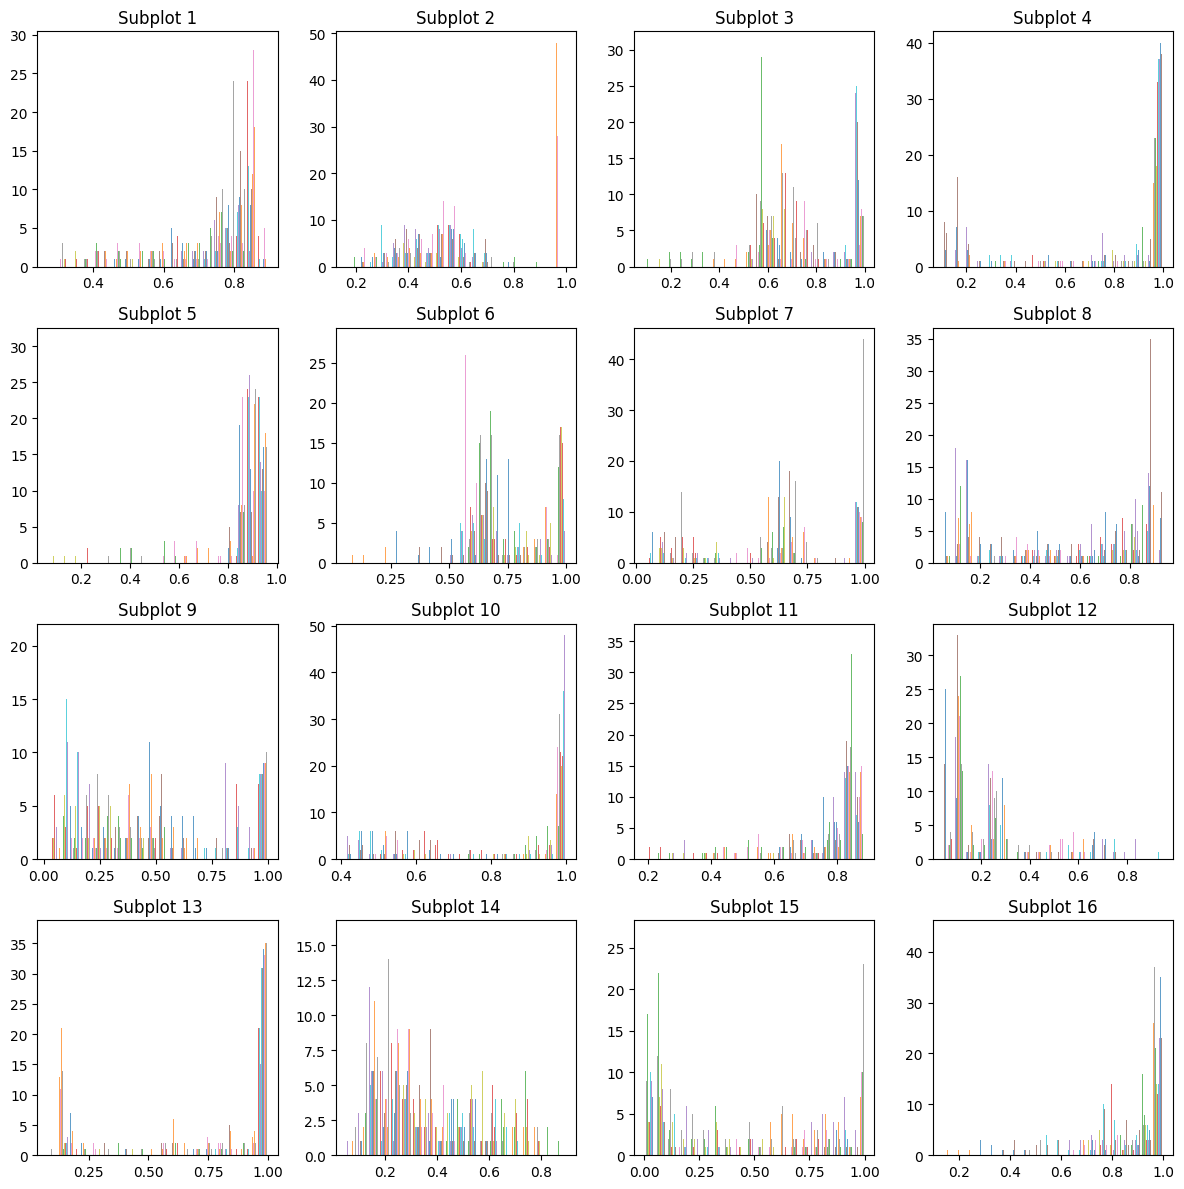

In [25]:
# 4x4 그리드의 서브플롯 생성
fig, axs = plt.subplots(4, 4, figsize=(12, 12))

# r_1990 배열에서 데이터 추출 및 히스토그램 그리기
for i in range(4):
    for j in range(4):
        axs[i, j].hist(r_1990[4 * i + j], bins=20,alpha=0.7)
        axs[i, j].set_title(f'Subplot {4 * i + j + 1}')

plt.tight_layout()  # 서브플롯 간 간격 조절
plt.show()

### 분포에서 뽑은 걸로 이미지 생성

In [46]:
# 초기화할 때 (48, 48, 3) 모양의 3차원 배열로 시작
sample1990 = np.zeros((48, 48, 3), dtype=np.float32)
lst = []
np.random.seed(45)
for k in range(48):
    r_sample = np.array([])
    g_sample = np.array([])
    b_sample = np.array([])
    
    for i in range(48):

        r_sample = np.append(r_sample, np.random.choice(r_vstack[:, i]))
        g_sample = np.append(g_sample, np.random.choice(g_vstack[:, i]))
        b_sample = np.append(b_sample, np.random.choice(b_vstack[:, i]))
    
    sample_ = np.stack([r_sample, g_sample, b_sample], axis=-1)

    
    # (k, :, :) 위치에 데이터 추가
    sample1990[k, :, :] = sample_


In [47]:
sample1990.shape

(48, 48, 3)

In [198]:
# r_sample = np.array([])
# g_sample = np.array([])
# b_sample = np.array([])

# sample1990 = np.empty((48, 3), dtype=np.float32)
# for k in range(48):
    
#     for i in range(48):
#         np.random.seed(i)
#         r_sample = np.append(r_sample,np.random.choice(r_vstack[:,i]))
#         g_sample = np.append(g_sample,np.random.choice(g_vstack[:,i]))
#         b_sample = np.append(b_sample,np.random.choice(b_vstack[:,i]))
#     sample_ = np.stack([r_sample,g_sample,b_sample], axis=-1)
#     sample1990 = np.stack([sample1990, sample_] )

In [49]:
sample1990.shape

(48, 48, 3)

In [48]:
img1990[0].shape

(48, 48, 3)

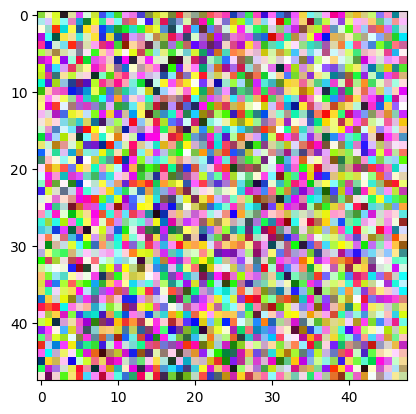

In [50]:
plt.imshow(sample1990)

In [ ]:
# 초기화할 때 (48, 48, 3) 모양의 3차원 배열로 시작
sample1990 = np.zeros((48, 48, 3), dtype=np.float32)
lst = []
np.random.seed(45)
for k in range(48):
    r_sample = np.array([])
    g_sample = np.array([])
    b_sample = np.array([])
    
    for i in range(48):

        r_sample = np.append(r_sample, np.random.choice(r_vstack[:, i]))
        g_sample = np.append(g_sample, np.random.choice(g_vstack[:, i]))
        b_sample = np.append(b_sample, np.random.choice(b_vstack[:, i]))
    
    sample_ = np.stack([r_sample, g_sample, b_sample], axis=-1)

    
    # (k, :, :) 위치에 데이터 추가
    sample1990[k, :, :] = sample_


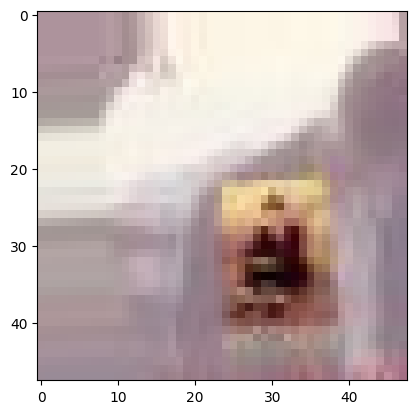

In [33]:
plt.imshow(img1990[5])

### VGG16 모델 불러오기

In [38]:
transfer_model = VGG16(weights='imagenet', include_top = False, input_shape=(48,48,3))
transfer_model.trainable = False

### 전이학습1

In [39]:
finetune_model = Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64, activation='relu'))
finetune_model.add(Dropout(0.5))
finetune_model.add(Dense(3, activation = 'softmax'))

In [40]:
finetune_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 64)                32832     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 14,747,715
Trainable params: 33,027
Non-trainable params: 14,714,688
_________________________________________________________________


In [41]:
finetune_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
early_stop = EarlyStopping(monitor='val_loss', patience = 5, min_delta = 0.05)

In [31]:
all_labels_ = np.vstack(all_labels)
all_labels_

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [30]:
all_ = np.stack(all_images)

In [310]:
all_.shape, all_labels_.shape

((2996, 48, 48, 3), (2996, 3))

In [311]:
result = finetune_model.fit(all_, all_labels_,epochs = 50,
                           validation_split=0.2,
                           callbacks=[early_stop])

Epoch 1/50
75/75 [==============================] - 14s 170ms/step - loss: 1.0854 - accuracy: 0.4157 - val_loss: 1.5921 - val_accuracy: 0.0167
Epoch 2/50
75/75 [==============================] - 16s 211ms/step - loss: 0.9901 - accuracy: 0.4946 - val_loss: 1.7639 - val_accuracy: 0.0183
Epoch 3/50
75/75 [==============================] - 14s 190ms/step - loss: 0.9661 - accuracy: 0.5259 - val_loss: 1.8575 - val_accuracy: 0.0267
Epoch 4/50
75/75 [==============================] - 15s 201ms/step - loss: 0.9373 - accuracy: 0.5413 - val_loss: 1.7140 - val_accuracy: 0.0783
Epoch 5/50
75/75 [==============================] - 14s 190ms/step - loss: 0.9217 - accuracy: 0.5588 - val_loss: 1.8747 - val_accuracy: 0.0467
Epoch 6/50
75/75 [==============================] - 15s 194ms/step - loss: 0.8979 - accuracy: 0.5856 - val_loss: 1.5822 - val_accuracy: 0.1250


In [ ]:
result = finetune_model.fit(new_img, new_label,epochs = 5,batch_size=1000,
                           validation_split=0.2,
                           callbacks=[early_stop])

Epoch 1/5
346/346 [==============================] - 3476s 10s/step - loss: 1.0225 - accuracy: 0.4844 - val_loss: 0.9375 - val_accuracy: 0.5569
Epoch 2/5
  4/346 [..............................] - ETA: 47:58 - loss: 0.9888 - accuracy: 0.5175

In [312]:
# # 커스텀 모델의 중간 레이어 선택 (예: Dense 레이어 직전)
# selected_layer = finetune_model.get_layer('dense_1')  # 예시: 'dense_1'은 원하는 레이어 이름

# # 중간 레이어의 출력을 추출하는 새로운 모델 생성
# feature_extraction_model = Model(inputs=finetune_model.input, outputs=selected_layer.output)

### 전이학습2

In [7]:
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D

In [22]:
transfer_model = VGG16(weights='imagenet', include_top=False, input_shape=(48,48,3))
transfer_model.trainable = False
transfer_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [33]:
model1=Sequential(name='cnn')
model1.add(transfer_model)
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(3,activation='softmax', name='output'))

In [34]:
model1.summary()

Model: "cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_11 (Flatten)        (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 100)               51300     
                                                                 
 flatten_12 (Flatten)        (None, 100)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 output (Dense)              (None, 3)                 303       
                                                                 
Total params: 14,776,391
Trainable params: 61,703
Non-trainable

In [35]:
model1.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [46]:
from keras.callbacks import EarlyStopping, ModelCheckpoint,LearningRateScheduler
model_path = './models/'
model_file = model_path + 'fashion.h5'
mcCB=ModelCheckpoint(model_file,save_best_only=True)
esCB=EarlyStopping(patience=5)
def scheduler(epoch,lr):
    if epoch > 10:
        return 0.00001
    else:
        return lr
lrDB = LearningRateScheduler(scheduler)

In [47]:
result=model1.fit(all_, all_labels_, batch_size=50, epochs=1000, validation_split=0.2, callbacks=[mcCB,esCB,lrDB])

Epoch 1/1000
48/48 [==============================] - 13s 283ms/step - loss: 0.0166 - accuracy: 0.9987 - val_loss: 5.3479 - val_accuracy: 0.1733 - lr: 0.0010
Epoch 2/1000
48/48 [==============================] - 15s 307ms/step - loss: 0.0127 - accuracy: 0.9996 - val_loss: 5.4636 - val_accuracy: 0.1833 - lr: 0.0010
Epoch 3/1000
48/48 [==============================] - 16s 334ms/step - loss: 0.0104 - accuracy: 0.9996 - val_loss: 5.5141 - val_accuracy: 0.1900 - lr: 0.0010
Epoch 4/1000
48/48 [==============================] - 16s 340ms/step - loss: 0.0095 - accuracy: 0.9996 - val_loss: 5.6507 - val_accuracy: 0.1900 - lr: 0.0010
Epoch 5/1000
48/48 [==============================] - 16s 334ms/step - loss: 0.0091 - accuracy: 0.9996 - val_loss: 5.7512 - val_accuracy: 0.1883 - lr: 0.0010
Epoch 6/1000
48/48 [==============================] - 17s 347ms/step - loss: 0.0080 - accuracy: 0.9996 - val_loss: 6.3422 - val_accuracy: 0.1700 - lr: 0.0010


In [48]:
# 입력 이미지 크기 설정
input_shape = (224, 224, 3)

# VGG16 모델 로드
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Sequential 모델 생성
model = Sequential()

# VGG16 모델 추가
model.add(base_model)

# Flatten 및 Dense 레이어 추가
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 분류 클래스 수에 맞게 조정

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
result=model1.fit(all_, all_labels_, batch_size=50, epochs=1000, validation_split=0.2, callbacks=[mcCB,esCB,lrDB])

Epoch 1/1000
48/48 [==============================] - 22s 471ms/step - loss: 0.0102 - accuracy: 0.9987 - val_loss: 6.1921 - val_accuracy: 0.1850 - lr: 0.0010
Epoch 2/1000
48/48 [==============================] - 26s 554ms/step - loss: 0.0075 - accuracy: 0.9992 - val_loss: 5.8160 - val_accuracy: 0.2150 - lr: 0.0010
Epoch 3/1000
48/48 [==============================] - 30s 625ms/step - loss: 0.0065 - accuracy: 0.9992 - val_loss: 6.6350 - val_accuracy: 0.1733 - lr: 0.0010
Epoch 4/1000
48/48 [==============================] - 24s 494ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 6.3254 - val_accuracy: 0.1933 - lr: 0.0010
Epoch 5/1000
43/48 [=========================>....] - ETA: 1s - loss: 0.0037 - accuracy: 1.0000